<a href="https://colab.research.google.com/github/lademir/TP-Final-iNF420/blob/main/TP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicao de quantidade de suicidios (DecisionTree & RandomForest)

## Sumário
> 1. Definição e armazenamento do dataset
> 2. Visualizacao rapida do dataset
> 3. Pre-processamento dos dados
> 4. implementação dos modelos
> 5. Comparacao entre os dois modelos


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## Armazenando o dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Faculdade/2022.1/INF 420/Trabalhos/Trabalho final/base/suicide_rate.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.shape

(27820, 12)

In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
# Dataset depois das mudancas de nome

df.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
print("Quantidade de dados com base no grupo: ")

print("\nGrupo de idade: ")
print(df.age_group.value_counts())

print("\nSexo: ")
print(df.gender.value_counts())

print("\nGeracao: ")
df.generation.value_counts()

Quantidade de dados com base no grupo: 

Grupo de idade: 
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

Sexo: 
male      13910
female    13910
Name: gender, dtype: int64

Geracao: 


Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [9]:
countries = df["country"].unique()
print("Quantidade de paises: ", len(countries))
countries

Quantidade de paises:  101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

## Visualizando o dataset

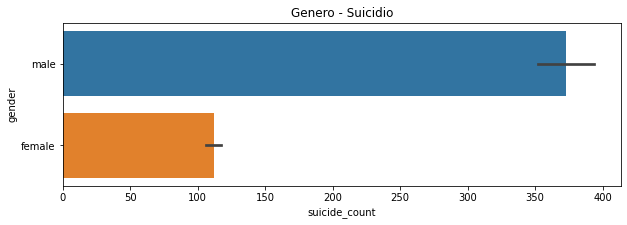

In [10]:
# Genero e suicidio

plt.figure(figsize=(10,3))
sns.barplot(x=df.suicide_count, y=df.gender)
plt.title("Genero - Suicidio")
plt.show()

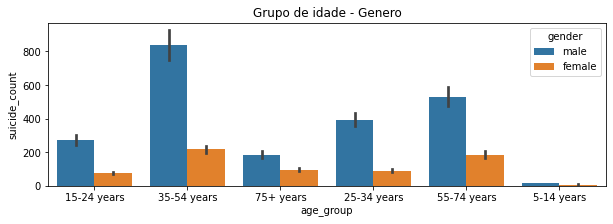

In [11]:
# Baseado no grupo de idade 

plt.figure(figsize=(10,3))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = df)
plt.title("Grupo de idade - Genero")
plt.show()

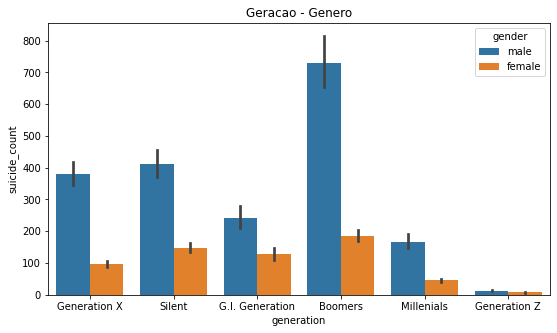

In [12]:
#Geracao - Genero

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = df)
plt.title('Geracao - Genero')
plt.show()

<Figure size 648x360 with 0 Axes>

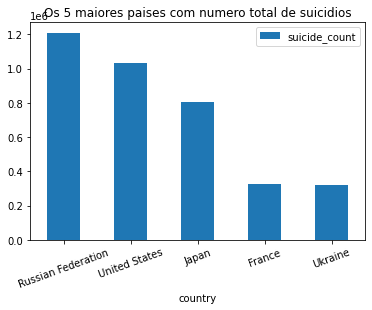

In [13]:
# 5 paises com maiores numeros de suicidio totais

top5 = df[['country','suicide_count']].groupby(['country']).sum().sort_values(by="suicide_count", ascending=False)[:5]

topdf = pd.DataFrame(top5)

plt.figure(figsize=(9,5))
topdf.plot.bar(rot=20)
plt.title("Os 5 maiores paises com numero total de suicidios")
plt.show()



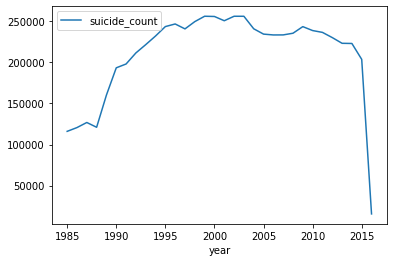

In [14]:
# Grafico de linha continua sobre a quantidade de suicidio com o decorrer dos anos

df[['year','suicide_count']].groupby(['year']).sum().plot()

## Pre-processamento do dataset

In [15]:
# Retira as linhas com dados inconsistentes
def dropNanFromCsv(dataset):
  notNullDataset = dataset.dropna()
  return notNullDataset

  
def groupBy(self, group):
  return self.suicide_dataset.groupby([group])

In [16]:
# Analizando quantos dos dados sao inconsistentes (null)

df.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [17]:
# Como a maioria das linhas possuem HDI_for_year null, vamos remove-la do dataframe

df = df.drop(["HDI for year"], axis=1)

df.head()



,country,year,gender,age_group,suicide_count,population,suicide_rate,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [18]:
# a coluna countr-year eh apenas uma juncao do pais com o ano, nao sera util para nosso estudo, entao vamos remove-la do dataframe

df = df.drop(["country-year"], axis=1)

df.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [19]:
# Agora temos nenhuma linha com dados inconsistentes

df.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_count     0
population        0
suicide_rate      0
gdp_for_year      0
gdp_per_capita    0
generation        0
dtype: int64

### Transformando as celulas de dados categoricos em numeros (label enconding)

In [20]:
# copiando o dataset antes de fazer o encoder para fins de comparacao

clean_dataset = df.copy()
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   gdp_for_year    27820 non-null  object 
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [21]:

from sklearn.preprocessing import LabelEncoder
categorical = ['year','age_group', 'gender', 'generation' , 'country']
le = LabelEncoder()

for column in categorical:
    df[column] = le.fit_transform(df[column])

df.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  int64  
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  int64  
 3   age_group       27820 non-null  int64  
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   gdp_for_year    27820 non-null  object 
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.1+ MB


# Implementacao do modelo

### Separando o dataframe em teste e validacao

In [23]:
y = df["suicide_count"]
X = df.drop(["suicide_rate", "suicide_count", "generation", "gdp_for_year", "gdp_per_capita"], axis=1)


print(y.shape)
print(X.shape)

(27820,)
(27820, 5)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20865, 5)
(20865,)
(6955, 5)
(6955,)


## Dados de comparacao entre os metodos

In [25]:
ML_Model = []
acc_train_res = []
acc_test_res = []
rmse_train_res = []
rmse_test_res = []
r2score_res = []
maxError_res = []

def storeResults(model, acc_train, acc_test, rmse_train, rmse_test, r2, max):
    ML_Model.append(model)
    acc_train_res.append(round(acc_train, 3))
    acc_test_res.append(round(acc_test, 3))
    rmse_train_res.append(round(rmse_train, 3))
    rmse_test_res.append(round(rmse_test, 3))
    r2score_res.append(round(r2))
    maxError_res.append(round(max))



## Random Forest Regressor

### Implementando o modelo

In [26]:
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=20)

forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=20)

In [27]:
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

### Metricas

In [28]:
from sklearn.metrics import mean_squared_error

acc_train_forest = forest.score(x_train, y_train) * 100
acc_test_forest = forest.score(x_test, y_test) * 100

rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Acuracia de treino: {:.3f}%".format(acc_train_forest))
print("Random Forest: Acuracia de validacao: {:.3f}%".format(acc_test_forest))

print("\nErro medio de treino: ", rmse_train_forest)
print("Erro medio de validacao: ", rmse_test_forest)

Random Forest: Acuracia de treino: 99.743%
Random Forest: Acuracia de validacao: 99.114%

Erro medio de treino:  46.105675157695266
Erro medio de validacao:  82.5345765373461


In [29]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_test_forest) * 100

print("Random Forest R2 score: {:.3f}%".format(r2score))

Random Forest R2 score: 99.114%


In [30]:
from sklearn.metrics import max_error

maxError = max_error(y_test, y_test_forest)

print("Random Forest erro maximo: {:.3f}".format(maxError))

Random Forest erro maximo: 2110.050


In [31]:
# armazenando os resultados

storeResults("RandomForest_20", acc_test=acc_test_forest, acc_train=acc_train_forest, rmse_train=rmse_train_forest, rmse_test=rmse_test_forest, r2=r2score, max=maxError)

### Problemas de overfitting?

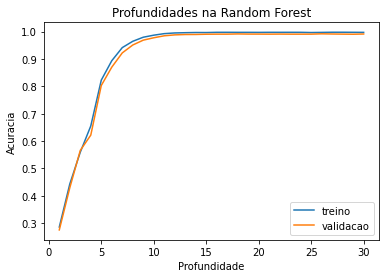

In [32]:
training_accuracy = []
test_accuracy = []

depth = range(1, 31)
for n in depth:
    tree = RandomForestRegressor(max_depth=n)
    tree.fit(x_train, y_train)
    training_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))

plt.plot(depth, training_accuracy, label="treino")
plt.plot(depth, test_accuracy, label="validacao")
plt.ylabel("Acuracia")  
plt.xlabel("Profundidade")
plt.title("Profundidades na Random Forest")
plt.legend()

In [33]:
forest = RandomForestRegressor(max_depth=7)

forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=7)

In [34]:
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

In [35]:
acc_train_forest = forest.score(x_train, y_train) * 100
acc_test_forest = forest.score(x_test, y_test) * 100

rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Acuracia de treino: {:.3f}%".format(acc_train_forest))
print("Random Forest: Acuracia de validacao: {:.3f}%".format(acc_test_forest))

print("\nErro medio de treino: ", rmse_train_forest)
print("Erro medio de validacao: ", rmse_test_forest)

from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_test_forest) * 100

print("\nRandom Forest R2 score: {:.3f}%".format(r2score))

from sklearn.metrics import max_error

maxError = max_error(y_test, y_test_forest)

print("\nRandom Forest erro maximo: {:.3f}".format(maxError))

Random Forest: Acuracia de treino: 94.308%
Random Forest: Acuracia de validacao: 92.371%

Erro medio de treino:  217.17413649272058
Erro medio de validacao:  242.16660312886805

Random Forest R2 score: 92.371%

Random Forest erro maximo: 4376.668


In [36]:
# Armazenando para comparacao

storeResults("RandomForest_7", acc_test=acc_test_forest, acc_train=acc_train_forest, rmse_train=rmse_train_forest, rmse_test=rmse_test_forest, r2=r2score, max=maxError)

### Predicao de uma amostra de tamanho 1

In [37]:
# country, year, gender, age_group, suicide_count, population, gdp_for_year, gdp_per_capta, generation

# gdp = PIB


# male = 1 | female = 0

# 0: 15-24
# 1: 25-34
# 2: 35-54
# 3: 5-14
# 4: 55-74
# 5: 75+

# male: 1 | female: 0

# Boomer: 0
# GI Generation: 1
# Geracao X: 2
# Geracao Z: 3
# Millenials: 4
# Silent: 5

# SINGLE PREDICTION

pais =  15

data = {
    'country': [pais],
    'year': [40],
    'gender': [1],
    'age_group': [0],
    'population': [31290000],
}

pred_feat = pd.DataFrame(data)

pais = le.inverse_transform([pais])

pred = forest.predict(pred_feat)

print("{} tera {} suicidios aproximadamente".format(max(pais), max(pred)))

#2973.80

Brazil tera 1629.9083962524403 suicidios aproximadamente


In [38]:
def make_prediction(data, model, range, feature):
  suicides = []
  for i in range:
    data[feature] = [i]
    pred_feat = pd.DataFrame(data)
    pred = model.predict(data)
    suicides.append(pred)
  return suicides                      

In [39]:
a = range(0,6)

suicide_per_age_group = []

for i in a:
  data = {
    'country': [57],
    'year': [37],
    'gender': [1],
    'age_group': [i],
    'population': [200000000],
  }

  pred_feat = pd.DataFrame(data)

  pred = forest.predict(pred_feat)

  suicide_per_age_group.append(pred)

print(pd.DataFrame(suicide_per_age_group))

pred_feat = pd.DataFrame(data)

print(make_prediction(pred_feat, forest, range(0,102), "country"))

             0
0  2971.354261
1  2975.720701
2  4940.822322
3   832.413232
4  4900.411326
5  4900.411326
[array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5034.33024561]), array([5110.99324927]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array([5193.78881686]), array(

## Decision tree

### Implementando o modelo

In [40]:
# DECISION TREE

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 20)

tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20)

### Metricas

In [41]:
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)

In [42]:
# Erro quadratico medio (mean_squared_error)

print("======================================================\nArvore de decisao\n======================================================")


acc_train_tree = tree.score(x_train, y_train) * 100
acc_test_tree = tree.score(x_test, y_test) * 100

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Acuracia nos dados de treino: {:.3f}%".format(acc_train_tree))
print("Acuracia nos dados de validacao: {:.3f}%".format(acc_test_tree))
print('\nA raiz do Erro meio quadrado nos dados de treino:', rmse_train_tree)
print('A raiz do Erro medio quadrado nos dados de validacao:', rmse_test_tree)

Arvore de decisao
Acuracia nos dados de treino: 99.999%
Acuracia nos dados de validacao: 99.081%

A raiz do Erro meio quadrado nos dados de treino: 3.2563804973744723
A raiz do Erro medio quadrado nos dados de validacao: 84.06711649592677


In [43]:
from sklearn.metrics import r2_score

r2score_tree = r2_score(y_test, y_test_tree) * 100

print("Arvore de decisao R2 score: {:.5f}%".format(r2score))

Arvore de decisao R2 score: 92.37122%


In [44]:
from sklearn.metrics import max_error

maxError_tree = max_error(y_test, y_test_tree)

print("Random Forest erro maximo: {:.3f}".format(maxError))

Random Forest erro maximo: 4376.668


In [45]:
# armazenando os resultados

storeResults("DecisionTree_20", acc_test=acc_test_tree, acc_train=acc_train_tree, rmse_train=rmse_train_tree, rmse_test=rmse_test_tree, r2=r2score_tree, max=maxError_tree)

### Problemas de overfitting?

> Vamos entao procurar qual seria a melhor profundidade maxima interessante para nao termos um problema de overfitting

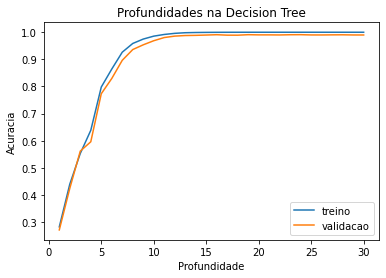

In [46]:
training_accuracy = []
test_accuracy = []

depth = range(1, 31)
for n in depth:
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(x_train, y_train)
    training_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))

plt.plot(depth, training_accuracy, label="treino")
plt.plot(depth, test_accuracy, label="validacao")
plt.ylabel("Acuracia")  
plt.xlabel("Profundidade")
plt.title("Profundidades na Decision Tree")
plt.legend()


# A partir desse grafico podemos observar que a profundidade maximo a partir de 10 chegamos em um problema de overfitting
# portanto é mais interessante manter a profundidade em 9 para nao ter esse problema

In [47]:
tree = DecisionTreeRegressor(max_depth = 7)

tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [48]:
# Erro quadratico medio (mean_squared_error)

print("======================================================\nArvore de decisao\n======================================================")

y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)

acc_train_tree = tree.score(x_train, y_train) * 100
acc_test_tree = tree.score(x_test, y_test) * 100

# Armazenando a raiz do erro medio quadratico
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Acuracia nos dados de treino: {:.3f}%".format(acc_train_tree))
print("Acuracia nos dados de validacao: {:.3f}%".format(acc_test_tree))
print('\nA raiz do Erro meio quadrado nos dados de treino:', rmse_train_tree)
print('A raiz do Erro medio quadrado nos dados de validacao:', rmse_test_tree)



from sklearn.metrics import r2_score

r2score_tree = r2_score(y_test, y_test_tree) * 100

print("\nArvore de decisao R2 score: {:.5f}%".format(r2score_tree))


from sklearn.metrics import max_error

maxError_tree = max_error(y_test, y_test_tree)

print("\nRandom Forest erro maximo: {:.3f}".format(maxError_tree))

Arvore de decisao
Acuracia nos dados de treino: 92.646%
Acuracia nos dados de validacao: 89.666%

A raiz do Erro meio quadrado nos dados de treino: 246.86162463581107
A raiz do Erro medio quadrado nos dados de validacao: 281.84759042471626

Arvore de decisao R2 score: 89.66632%

Random Forest erro maximo: 6169.667


In [49]:
storeResults("DecisionTree_7", acc_test=acc_test_tree, acc_train=acc_train_tree, rmse_train=rmse_train_tree, rmse_test=rmse_test_tree, r2=r2score_tree, max=maxError_tree)

### Predicao de uma amostra de tamanho 1

In [50]:
# SINGLE PREDICTION

data = {
    'country': [87],
    'year': [37],
    'gender': [1],
    'age_group': [3],
    'population': [200000000],
}


pred_feat = pd.DataFrame(data)

pred = tree.predict(pred_feat)

print("Tera {:.3f} suicidios aproximadamente".format(max(pred)))

Tera 11654.750 suicidios aproximadamente


# Comparacao entre os modelos

In [51]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Treino Acuracia': acc_train_res,
    'Teste Acuracia': acc_test_res,
    'Raiz EMQ treino': rmse_train_res,
    'Raiz EMQ validacao': rmse_test_res,
    'R2 Score': r2score_res,
    'Erro máximo': maxError_res
    })

results

,ML Model,Treino Acuracia,Teste Acuracia,Raiz EMQ treino,Raiz EMQ validacao,R2 Score,Erro máximo
0,RandomForest_20,99.743,99.114,46.106,82.535,99,2110
1,RandomForest_7,94.308,92.371,217.174,242.167,92,4377
2,DecisionTree_20,99.999,99.081,3.256,84.067,99,1748
3,DecisionTree_7,92.646,89.666,246.862,281.848,90,6170
